In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch,random,numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

In [2]:
assets = ['MSFT', 'MCD','FB','F','BA','PFE','AMZN','XOM','JPM', 'T','UL','GOOG','WMT','DIS','AMD','AAPL','GE','GS','V','NVDA']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2015-01-01', 
                                                  end_date='2020-01-01', 
                                                  time_interval='daily')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['close'] for x in data[a]['prices']} for a in assets
})

In [3]:
prices_df

,MSFT,MCD,FB,F,BA,PFE,AMZN,XOM,JPM,T,UL,GOOG,WMT,DIS,AMD,AAPL,GE,GS,V,NVDA
2015-01-02,46.759998,93.260002,78.449997,15.36,129.949997,29.724857,308.519989,92.830002,62.490002,33.869999,39.980000,523.373108,85.900002,93.750000,2.670000,27.332500,192.769226,194.410004,66.254997,5.032500
2015-01-05,46.330002,92.230003,77.190002,14.76,129.050003,29.563566,302.190002,90.290001,60.549999,33.549999,39.230000,512.463013,85.650002,92.379997,2.660000,26.562500,189.230774,188.339996,64.792503,4.947500
2015-01-06,45.650002,92.400002,76.150002,14.62,127.529999,29.810247,295.290009,89.809998,58.980000,33.599998,39.029999,500.585632,86.309998,91.889999,2.630000,26.565001,185.153839,184.529999,64.375000,4.797500
2015-01-07,46.230000,94.010002,76.150002,15.04,129.509995,30.218216,298.420013,90.720001,59.070000,33.169998,39.450001,499.727997,88.599998,92.830002,2.580000,26.937500,185.230774,187.279999,65.237503,4.785000
2015-01-08,47.590000,94.360001,78.180000,15.42,131.800003,30.834915,300.459991,92.230003,60.389999,33.500000,40.180000,501.303680,90.470001,93.790001,2.610000,27.972500,187.461533,190.270004,66.112503,4.965000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,157.380005,196.669998,205.119995,9.47,333.000000,37.277039,1789.209961,70.019997,137.580002,38.959999,56.689999,1343.560059,119.510002,145.289993,46.540001,71.067497,89.519997,229.910004,187.570007,59.654999
2019-12-26,158.669998,197.059998,207.789993,9.45,329.920013,37.362431,1868.770020,70.129997,139.039993,39.160000,56.799999,1360.400024,119.519997,145.699997,46.630001,72.477501,89.839996,231.210007,189.160004,59.797501
2019-12-27,158.960007,198.169998,208.100006,9.36,330.140015,37.305504,1869.800049,69.889999,139.139999,39.240002,57.689999,1351.890015,119.589996,145.750000,46.180000,72.449997,89.440002,230.660004,189.389999,59.217499
2019-12-30,157.589996,196.910004,204.410004,9.25,326.399994,36.916508,1846.890015,69.480003,138.630005,39.040001,57.299999,1336.140015,119.400002,143.770004,45.520000,72.879997,88.639999,229.800003,187.830002,58.080002


In [4]:
daily_returns = prices_df.pct_change()
daily_returns.describe()

,MSFT,MCD,FB,F,BA,PFE,AMZN,XOM,JPM,T,UL,GOOG,WMT,DIS,AMD,AAPL,GE,GS,V,NVDA
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.001075,0.000654,0.000924,-0.000279,0.000859,0.000243,0.001593,-0.000154,0.000726,0.000181,0.000358,0.000860,0.000334,0.000424,0.003052,0.000909,-0.000436,0.000246,0.000912,0.002315
std,0.014704,0.010662,0.017776,0.015502,0.015944,0.011436,0.018426,0.012099,0.013249,0.011586,0.012171,0.015122,0.012353,0.012552,0.040430,0.015662,0.018794,0.014990,0.012840,0.026910
min,-0.092533,-0.050417,-0.189609,-0.081647,-0.089290,-0.064174,-0.078197,-0.056903,-0.069477,-0.080557,-0.090938,-0.076966,-0.101832,-0.091708,-0.242291,-0.099607,-0.112957,-0.074556,-0.052698,-0.187559
25%,-0.005519,-0.004650,-0.006551,-0.007848,-0.007384,-0.005426,-0.006551,-0.006644,-0.005784,-0.005191,-0.005345,-0.006029,-0.005517,-0.005578,-0.016729,-0.005937,-0.008675,-0.007584,-0.005091,-0.009699
50%,0.000843,0.000897,0.000951,0.000000,0.000875,0.000295,0.001305,0.000000,0.000461,0.000534,0.000347,0.000629,0.000622,0.000443,0.001408,0.000855,-0.000373,0.000427,0.001481,0.002393
75%,0.008053,0.006113,0.010459,0.008119,0.009729,0.006096,0.009935,0.006247,0.007576,0.006490,0.006757,0.008257,0.006408,0.006397,0.020376,0.008879,0.007613,0.008671,0.007778,0.014948
max,0.104522,0.081237,0.155214,0.107447,0.098795,0.070667,0.141311,0.055159,0.083286,0.049972,0.140005,0.160524,0.108984,0.115437,0.522901,0.070422,0.116484,0.095437,0.074427,0.298067


In [6]:
def plot_data(df, title="Stock returns"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Daily returns")
    plt.show()


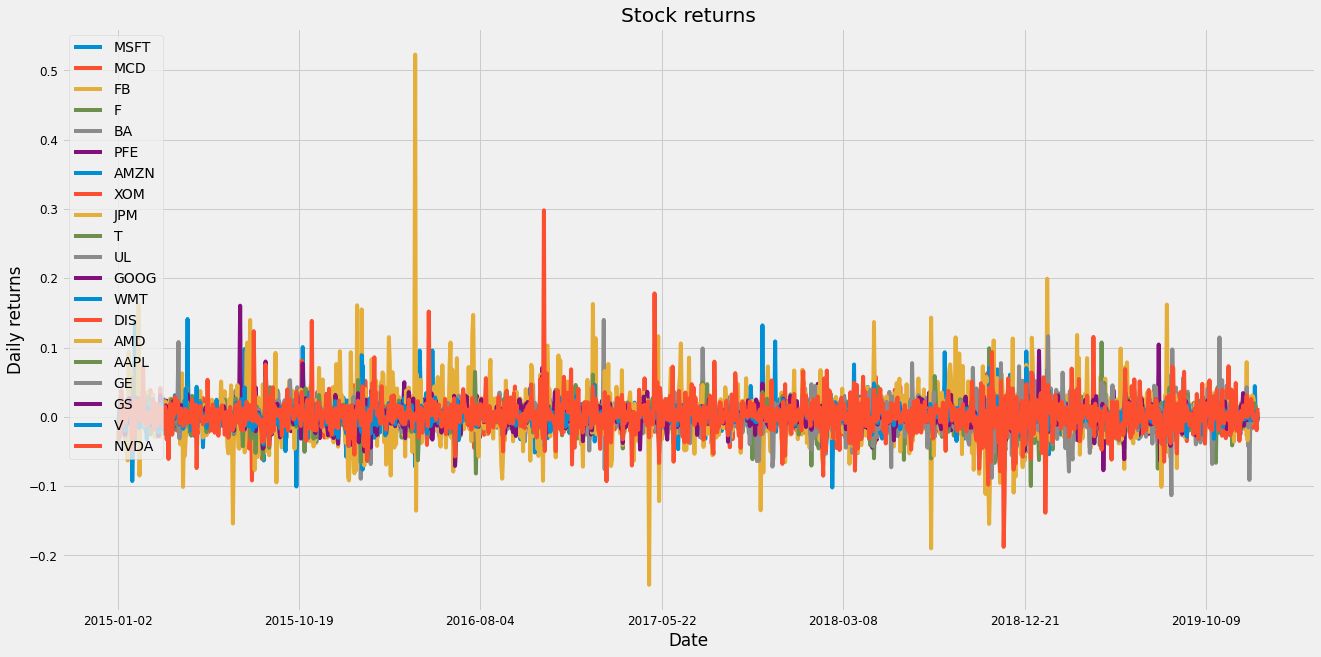

In [7]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

plot = plot_data(daily_returns)


In [8]:
cov,corr=daily_returns.cov(),daily_returns.corr()


In [9]:
corr.style.background_gradient(cmap='coolwarm')

,MSFT,MCD,FB,F,BA,PFE,AMZN,XOM,JPM,T,UL,GOOG,WMT,DIS,AMD,AAPL,GE,GS,V,NVDA
MSFT,1.000000,0.379777,0.514109,0.346220,0.415060,0.393002,0.625687,0.385677,0.485106,0.260065,0.330034,0.658299,0.277789,0.389741,0.245268,0.571620,0.270125,0.485450,0.672915,0.467614
MCD,0.379777,1.000000,0.270253,0.236000,0.250215,0.293927,0.276040,0.279086,0.322582,0.234287,0.299163,0.298032,0.298866,0.288419,0.133725,0.266767,0.165784,0.280303,0.382367,0.170349
FB,0.514109,0.270253,1.000000,0.319924,0.317867,0.267770,0.569372,0.279653,0.334665,0.145377,0.231693,0.599375,0.156339,0.278823,0.218908,0.460800,0.230163,0.355974,0.503453,0.372473
F,0.346220,0.236000,0.319924,1.000000,0.330180,0.321897,0.262994,0.378431,0.505880,0.327277,0.242379,0.300656,0.200129,0.373678,0.206802,0.296820,0.362948,0.485231,0.366001,0.292572
BA,0.415060,0.250215,0.317867,0.330180,1.000000,0.287540,0.345871,0.395184,0.470573,0.259062,0.242188,0.360518,0.262460,0.349164,0.242663,0.406438,0.280620,0.463832,0.441557,0.316288
PFE,0.393002,0.293927,0.267770,0.321897,0.287540,1.000000,0.283083,0.372812,0.418699,0.297458,0.270658,0.340108,0.297443,0.324264,0.187544,0.309032,0.261049,0.369592,0.411650,0.207128
AMZN,0.625687,0.276040,0.569372,0.262994,0.345871,0.283083,1.000000,0.294978,0.351867,0.186252,0.224620,0.640953,0.189504,0.300619,0.268691,0.492717,0.229784,0.374090,0.553176,0.396910
XOM,0.385677,0.279086,0.279653,0.378431,0.395184,0.372812,0.294978,1.000000,0.522698,0.363980,0.255103,0.342806,0.261678,0.360429,0.218915,0.366708,0.342992,0.478522,0.395854,0.251396
JPM,0.485106,0.322582,0.334665,0.505880,0.470573,0.418699,0.351867,0.522698,1.000000,0.334504,0.258574,0.413371,0.270813,0.460603,0.251346,0.432285,0.384374,0.827134,0.512971,0.348689
T,0.260065,0.234287,0.145377,0.327277,0.259062,0.297458,0.186252,0.363980,0.334504,1.000000,0.251650,0.233690,0.294515,0.327874,0.153406,0.240818,0.275453,0.324513,0.247031,0.172022


In [10]:
cov

,MSFT,MCD,FB,F,BA,PFE,AMZN,XOM,JPM,T,UL,GOOG,WMT,DIS,AMD,AAPL,GE,GS,V,NVDA
MSFT,0.000216,0.000060,0.000134,0.000079,0.000097,0.000066,0.000170,0.000069,0.000095,0.000044,0.000059,0.000146,0.000050,0.000072,0.000146,0.000132,0.000075,0.000107,0.000127,0.000185
MCD,0.000060,0.000114,0.000051,0.000039,0.000043,0.000036,0.000054,0.000036,0.000046,0.000029,0.000039,0.000048,0.000039,0.000039,0.000058,0.000045,0.000033,0.000045,0.000052,0.000049
FB,0.000134,0.000051,0.000316,0.000088,0.000090,0.000054,0.000186,0.000060,0.000079,0.000030,0.000050,0.000161,0.000034,0.000062,0.000157,0.000128,0.000077,0.000095,0.000115,0.000178
F,0.000079,0.000039,0.000088,0.000240,0.000082,0.000057,0.000075,0.000071,0.000104,0.000059,0.000046,0.000070,0.000038,0.000073,0.000130,0.000072,0.000106,0.000113,0.000073,0.000122
BA,0.000097,0.000043,0.000090,0.000082,0.000254,0.000052,0.000102,0.000076,0.000099,0.000048,0.000047,0.000087,0.000052,0.000070,0.000156,0.000101,0.000084,0.000111,0.000090,0.000136
PFE,0.000066,0.000036,0.000054,0.000057,0.000052,0.000131,0.000060,0.000052,0.000063,0.000039,0.000038,0.000059,0.000042,0.000047,0.000087,0.000055,0.000056,0.000063,0.000060,0.000064
AMZN,0.000170,0.000054,0.000186,0.000075,0.000102,0.000060,0.000340,0.000066,0.000086,0.000040,0.000050,0.000179,0.000043,0.000070,0.000200,0.000142,0.000080,0.000103,0.000131,0.000197
XOM,0.000069,0.000036,0.000060,0.000071,0.000076,0.000052,0.000066,0.000146,0.000084,0.000051,0.000038,0.000063,0.000039,0.000055,0.000107,0.000069,0.000078,0.000087,0.000061,0.000082
JPM,0.000095,0.000046,0.000079,0.000104,0.000099,0.000063,0.000086,0.000084,0.000176,0.000051,0.000042,0.000083,0.000044,0.000077,0.000135,0.000090,0.000096,0.000164,0.000087,0.000124
T,0.000044,0.000029,0.000030,0.000059,0.000048,0.000039,0.000040,0.000051,0.000051,0.000134,0.000035,0.000041,0.000042,0.000048,0.000072,0.000044,0.000060,0.000056,0.000037,0.000054


In [11]:
def pcaWeights(cov,riskDist=None,riskTarget=1):
    # Following the riskAlloc distribution, match riskTarget
    eVal,eVec=np.linalg.eigh(cov) #must be Hermitian
    indices=eVal.argsort()[::-1]# arguments for sorting eVal desc
    eVal,eVec=eVal[indices],eVec[:,indices]
    if riskDist is None:
        riskDist=np.zeros(cov.shape[0])
        riskDist[-1]=1.
    loads=riskTarget*(riskDist/eVal)**.5
    wghts=np.dot(eVec,np.reshape(loads,(-1,1)))
    #ctr=(loads/riskTarget)**2*eVal#verify riskDist
    return wghts

In [12]:
pca = pcaWeights(cov =cov ,riskDist=None,riskTarget=1)
pca

array([[ 6.85496300e+00],
       [ 9.53511038e+00],
       [-1.41002582e+00],
       [ 4.05885433e+00],
       [ 1.58966087e+00],
       [ 1.18088092e+01],
       [-1.54403278e+00],
       [ 1.37745718e+01],
       [-1.37294427e+02],
       [-5.99028473e+00],
       [-1.35166138e+00],
       [-4.85047045e+00],
       [ 1.27559557e+00],
       [ 8.06728739e+00],
       [ 8.28621034e-02],
       [-3.91574975e+00],
       [-9.19264616e-01],
       [ 1.07381171e+02],
       [-7.32441297e+00],
       [-9.71277906e-01]])

In [13]:
def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    ivp=1./np.diag(cov)
    ivp/=ivp.sum()
    return ivp

In [14]:
ivp = getIVP(cov)
ivp

array([0.04686247, 0.08913776, 0.03206565, 0.04216316, 0.03985895,
       0.07747861, 0.02984439, 0.06921763, 0.05772006, 0.07548597,
       0.06840535, 0.04431184, 0.06639918, 0.0643089 , 0.00619886,
       0.04130626, 0.02868804, 0.04509383, 0.06146042, 0.01399267])

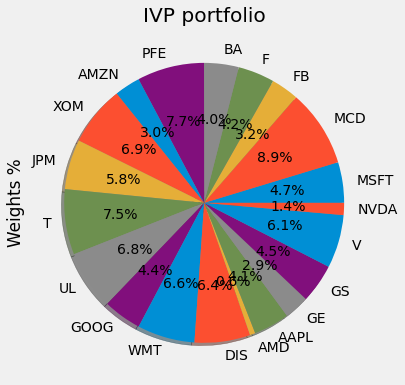

In [15]:
w1 = np.around(ivp*100, decimals=2)
w_ivp = pd.DataFrame(data = w1)
w_ivp.columns =['Weights %']
w_ivp.index = assets
plot = w_ivp.plot.pie(y='Weights %', title="IVP portfolio", legend=False, autopct='%1.1f%%', 
                   shadow=True, startangle=0, figsize=(6, 6))

In [16]:
def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

In [17]:
dist = correlDist(corr)

In [18]:
link = linkage(dist,'single')

<ipython-input-18-9619c5d8bddf>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist,'single')


In [19]:
def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

In [20]:
sortIx = getQuasiDiag(link)
sortIx
sortIx = corr.index[sortIx].tolist()

In [21]:
def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

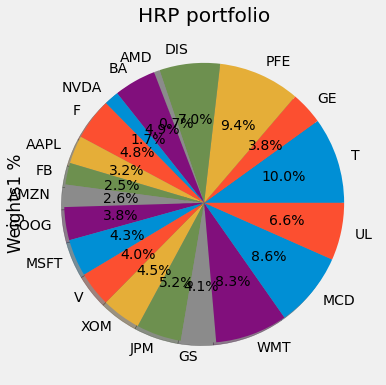

In [22]:
w2 = getRecBipart(cov, sortIx)
w2 = np.around(w2*100, decimals=4)
w_hrp = pd.DataFrame(data = w2)
w_hrp.columns =['Weights1 %']

plot1 = w_hrp.plot.pie(y='Weights1 %', title="HRP portfolio", legend=False, autopct='%1.1f%%', 
                   shadow=True, startangle=0, figsize=(6, 6))


In [23]:
w2

T       9.9534
GE      3.7827
PFE     9.4343
DIS     6.9848
AMD     0.6733
BA      4.8541
NVDA    1.7041
F       4.7947
AAPL    3.2236
FB      2.5025
AMZN    2.5761
GOOG    3.8249
MSFT    4.2789
V       4.0224
XOM     4.5300
JPM     5.1847
GS      4.0506
WMT     8.3481
MCD     8.6436
UL      6.6332
dtype: float64

In [24]:
dist

,MSFT,MCD,FB,F,BA,PFE,AMZN,XOM,JPM,T,UL,GOOG,WMT,DIS,AMD,AAPL,GE,GS,V,NVDA
MSFT,0.000000,0.556876,0.492895,0.571743,0.540805,0.550907,0.432616,0.554222,0.507392,0.608250,0.578777,0.413341,0.600921,0.552385,0.614301,0.462807,0.604100,0.507223,0.404404,0.515939
MCD,0.556876,0.000000,0.604047,0.618061,0.612285,0.594169,0.601648,0.600381,0.581987,0.618754,0.591962,0.592439,0.592087,0.596482,0.658132,0.605489,0.645839,0.599874,0.555712,0.644069
FB,0.492895,0.604047,0.000000,0.583128,0.584009,0.605075,0.464020,0.600145,0.576774,0.653691,0.619801,0.447563,0.649485,0.600490,0.624937,0.519230,0.620418,0.567462,0.498271,0.560146
F,0.571743,0.618061,0.583128,0.000000,0.578714,0.582281,0.607044,0.557481,0.497052,0.579967,0.615476,0.591331,0.632405,0.559608,0.629761,0.592950,0.564381,0.507331,0.563027,0.594739
BA,0.540805,0.612285,0.584009,0.578714,0.000000,0.596850,0.571895,0.549916,0.514503,0.608662,0.615553,0.565456,0.607264,0.570454,0.615360,0.544776,0.599741,0.517768,0.528414,0.584685
PFE,0.550907,0.594169,0.605075,0.582281,0.596850,0.000000,0.598714,0.559995,0.539120,0.592681,0.603880,0.574409,0.592688,0.581264,0.637360,0.587779,0.607845,0.561430,0.542379,0.629632
AMZN,0.432616,0.601648,0.464020,0.607044,0.571895,0.598714,0.000000,0.593726,0.569268,0.637867,0.622647,0.423702,0.636591,0.591346,0.604694,0.503628,0.620571,0.559424,0.472665,0.549131
XOM,0.554222,0.600381,0.600145,0.557481,0.549916,0.559995,0.593726,0.000000,0.488519,0.563924,0.610285,0.573234,0.607586,0.565496,0.624934,0.562713,0.573153,0.510626,0.549612,0.611802
JPM,0.507392,0.581987,0.576774,0.497052,0.514503,0.539120,0.569268,0.488519,0.000000,0.576843,0.608862,0.541585,0.603816,0.519325,0.611823,0.532783,0.554809,0.293995,0.493472,0.570662
T,0.608250,0.618754,0.653691,0.579967,0.608662,0.592681,0.637867,0.563924,0.576843,0.000000,0.611699,0.618995,0.593921,0.579709,0.650613,0.616109,0.601892,0.581157,0.613583,0.643420


In [25]:
df0=corr.loc[sortIx,sortIx]
df0

,T,GE,PFE,DIS,AMD,BA,NVDA,F,AAPL,FB,AMZN,GOOG,MSFT,V,XOM,JPM,GS,WMT,MCD,UL
T,1.000000,0.275453,0.297458,0.327874,0.153406,0.259062,0.172022,0.327277,0.240818,0.145377,0.186252,0.233690,0.260065,0.247031,0.363980,0.334504,0.324513,0.294515,0.234287,0.251650
GE,0.275453,1.000000,0.261049,0.264419,0.190863,0.280620,0.251890,0.362948,0.275666,0.230163,0.229784,0.255628,0.270125,0.265335,0.342992,0.384374,0.385120,0.152957,0.165784,0.161497
PFE,0.297458,0.261049,1.000000,0.324264,0.187544,0.287540,0.207128,0.321897,0.309032,0.267770,0.283083,0.340108,0.393002,0.411650,0.372812,0.418699,0.369592,0.297443,0.293927,0.270658
DIS,0.327874,0.264419,0.324264,1.000000,0.213809,0.349164,0.262853,0.373678,0.368238,0.278823,0.300619,0.333342,0.389741,0.422473,0.360429,0.460603,0.427431,0.270297,0.288419,0.244545
AMD,0.153406,0.190863,0.187544,0.213809,1.000000,0.242663,0.433829,0.206802,0.288700,0.218908,0.268691,0.226405,0.245268,0.309166,0.218915,0.251346,0.257884,0.098276,0.133725,0.112906
BA,0.259062,0.280620,0.287540,0.349164,0.242663,1.000000,0.316288,0.330180,0.406438,0.317867,0.345871,0.360518,0.415060,0.441557,0.395184,0.470573,0.463832,0.262460,0.250215,0.242188
NVDA,0.172022,0.251890,0.207128,0.262853,0.433829,0.316288,1.000000,0.292572,0.429166,0.372473,0.396910,0.411458,0.467614,0.447946,0.251396,0.348689,0.376358,0.160617,0.170349,0.142221
F,0.327277,0.362948,0.321897,0.373678,0.206802,0.330180,0.292572,1.000000,0.296820,0.319924,0.262994,0.300656,0.346220,0.366001,0.378431,0.505880,0.485231,0.200129,0.236000,0.242379
AAPL,0.240818,0.275666,0.309032,0.368238,0.288700,0.406438,0.429166,0.296820,1.000000,0.460800,0.492717,0.521287,0.571620,0.531210,0.366708,0.432285,0.454679,0.232422,0.266767,0.259082
FB,0.145377,0.230163,0.267770,0.278823,0.218908,0.317867,0.372473,0.319924,0.460800,1.000000,0.569372,0.599375,0.514109,0.503453,0.279653,0.334665,0.355974,0.156339,0.270253,0.231693


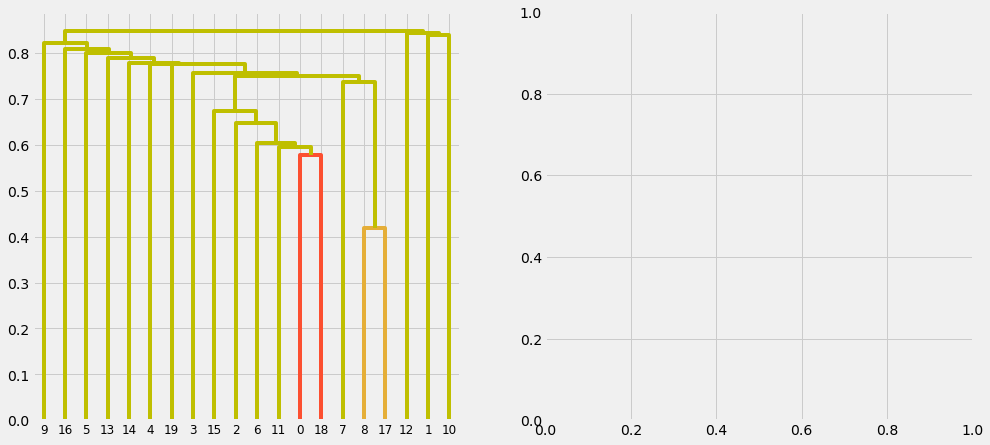

In [26]:
Z = pd.DataFrame(link)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top')
plt.show()

In [27]:
def plotCorrMatrix(path,corr,labels = None):
    # Heatmap of the correlation matrix
    if labels is None:labels=[]
    mpl.pcolor(corr)
    mpl.colorbar()
    mpl.yticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.xticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.savefig(path)
    mpl.clf();mpl.close() # reset pylab
    return

In [ ]:
import os

os.chdir("/Users/apple/Desktop/python")

plotCorrMatrix('HRP3_corr1.png',df0,labels=df0.columns)
plotCorrMatrix('HRP3_corr0.png',corr,labels=corr.columns)